# London Airbnb Dataset Exploration

# Analysis Part-II

In this we are going to analyze the data with respect to host and see the rise of Airbnb across the time

Start with importing all the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,8]
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('newyork_airbnb.csv')

In [3]:
# we will select following features for our analysis

selected=['review_scores_cleanliness','review_scores_rating','host_id','host_name','host_since',
          'host_location','host_response_time','host_response_rate','host_acceptance_rate',
          'host_is_superhost','host_listings_count','host_identity_verified','host_has_profile_pic','price'
         ]

df_selected=df[selected]

In [4]:
#looking data briefly for getting some what more deeper intuition about our data set

df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85207 entries, 0 to 85206
Data columns (total 14 columns):
review_scores_cleanliness    62071 non-null float64
review_scores_rating         62122 non-null float64
host_id                      85207 non-null int64
host_name                    85179 non-null object
host_since                   85179 non-null object
host_location                84970 non-null object
host_response_time           48565 non-null object
host_response_rate           48565 non-null object
host_acceptance_rate         63023 non-null object
host_is_superhost            85179 non-null object
host_listings_count          85179 non-null float64
host_identity_verified       85179 non-null object
host_has_profile_pic         85179 non-null object
price                        85207 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 5.9+ MB


above we can see many values are missing but for review_scores_cleanliness and review_scores_rating we can replace missing values directly with 0 reviews and than all the rows with the null values

In [5]:
df_selected['review_scores_rating'].fillna(0,inplace=True)
df_selected['review_scores_cleanliness'].fillna(0,inplace=True)
df_selected.dropna(axis=0,inplace=True)

In [6]:
# Now convert the host_response_rate and host_response_rate into float

df_selected['host_response_rate']=df_selected['host_response_rate'].apply(lambda x: float(x.replace('%','')))
df_selected['host_acceptance_rate']=df_selected['host_acceptance_rate'].apply(lambda x: float(x.replace('%','')))

# Convert price into a float
df_selected['price']=df_selected['price'].apply(lambda x: x.replace('$',''))
df_selected['price']=df_selected['price'].apply(lambda x: float(x.replace(',','')))

In [7]:
# Now we will convert the host_since to date time and we will extract month and year from it.

df_selected['host_since']=pd.to_datetime(df_selected['host_since'])
df_selected['host_since_year']=df_selected['host_since'].dt.year
df_selected['host_since_month']=df_selected['host_since'].dt.month

mapping={1:'Jan',2:'Feb',3:'mar',4:'Apr',
        5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',
        10:'Oct',11:'Nov',12:'Dec'}
df_selected['host_since_month_2']=df_selected['host_since_month'].map(mapping)

# Visualizations

here we are going to explore the rise of airbnb over years and we will see this relation with respect to the host association

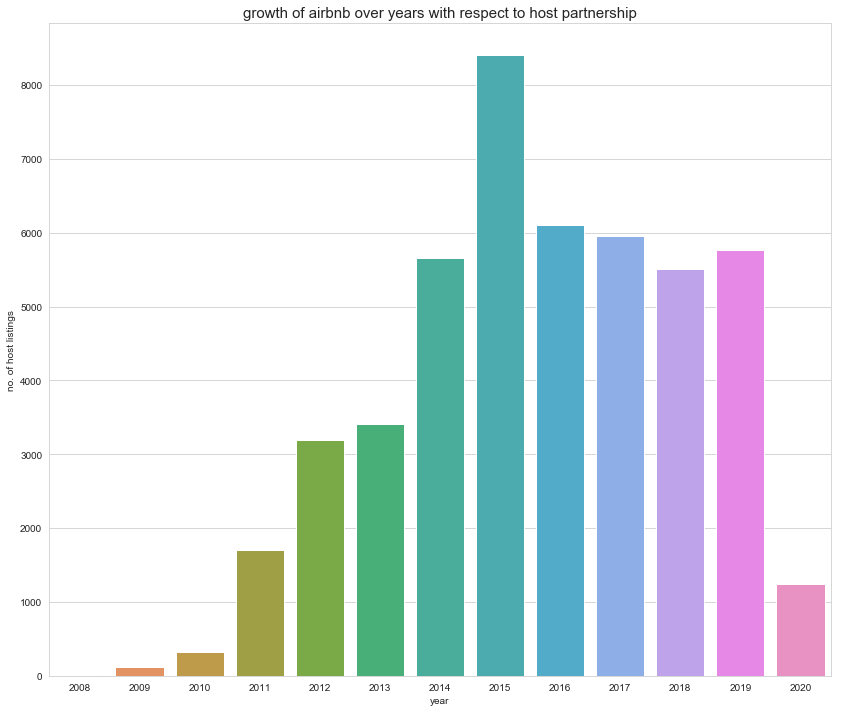

In [8]:
data=df_selected.groupby('host_since_year').count()

plt.figure(figsize=(14,12))
sns.barplot(data=data,x=data.index,y='host_name')
plt.xlabel('year')
plt.ylabel('no. of host listings')
plt.title('growth of airbnb over years with respect to host partnership',fontsize=15)
plt.show()

here we can see from 2008 to 2015 the graph is exponentially increasing and it had dropped suddenly at 2020.

Text(0.5, 1.0, 'performance of top 10 host')

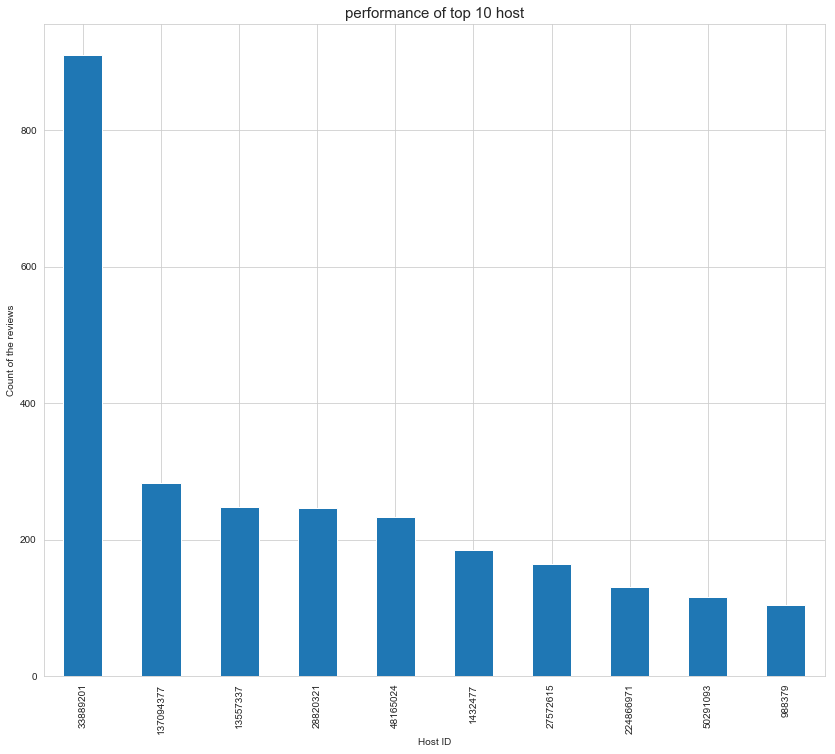

In [9]:
# Now we will looking at the performance of the top 10 host

data=df_selected['host_id'].value_counts().head(10)
plt.figure(figsize=(14,12))
data.plot(kind='bar')
plt.xlabel('Host ID')
plt.ylabel('Count of the reviews')
plt.title('performance of top 10 host',fontsize=15)

Now we are going to analyze between host_response_rate and review_scores_rating to see the relationship of host and host_is_super_host

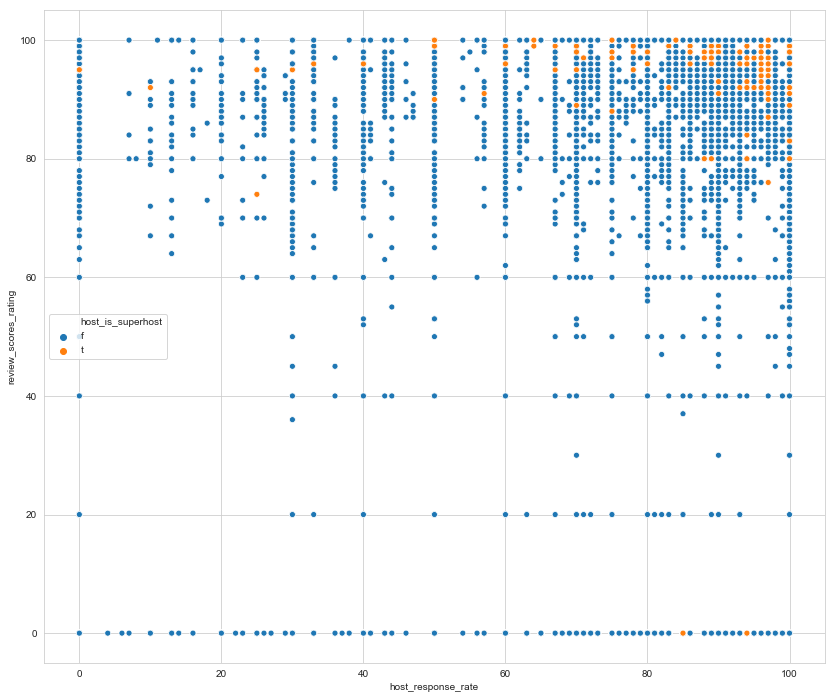

In [10]:
plt.figure(figsize=(14,12))
sns.scatterplot(df_selected['host_response_rate'],df_selected['review_scores_rating'],hue=df_selected['host_is_superhost'])
plt.show()

Above we can see that for becoming a super host review_score_rating should be strictly tough but however some outliers are there at the bottom of the plot.

Now we will explore the reviewing process with respect to months in a particular year we will see this from 2011 to 2016

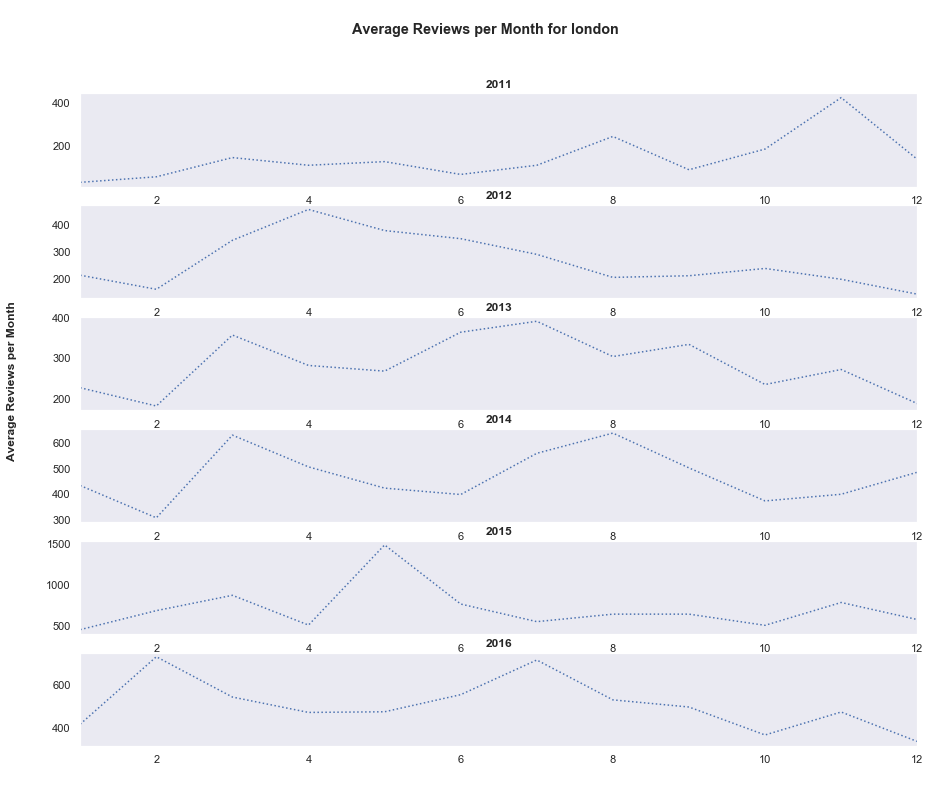

In [13]:
# collect individual year in a particular data frame
plt.figure(figsize=(15,12))

data_2011=df_selected[df_selected['host_since_year'] == 2011].groupby('host_since_month')['review_scores_rating'].count()
data_2012=df_selected[df_selected['host_since_year'] == 2012].groupby('host_since_month')['review_scores_rating'].count()
data_2013=df_selected[df_selected['host_since_year'] == 2013].groupby('host_since_month')['review_scores_rating'].count()
data_2014=df_selected[df_selected['host_since_year'] == 2014].groupby('host_since_month')['review_scores_rating'].count()
data_2015=df_selected[df_selected['host_since_year'] == 2015].groupby('host_since_month')['review_scores_rating'].count()
data_2016=df_selected[df_selected['host_since_year'] == 2016].groupby('host_since_month')['review_scores_rating'].count()

# plot above data in vertical rows
sns.set(style="dark")
plt.subplot(6,1,1)
data_2011.plot(style=':')
plt.title('2011',fontweight='bold')
plt.xlabel('')

plt.subplot(6,1,2)
data_2012.plot(style=':')
plt.title('2012',fontweight='bold')
plt.xlabel('')

plt.subplot(6,1,3)
data_2013.plot(style=':')
plt.title('2013',fontweight='bold')
plt.xlabel('')

plt.subplot(6,1,4)
data_2014.plot(style=':')
plt.title('2014',fontweight='bold')
plt.xlabel('')

plt.subplot(6,1,5)
data_2015.plot(style=':')
plt.title('2015',fontweight='bold')
plt.xlabel('')

plt.subplot(6,1,6)
data_2016.plot(style=':')
plt.title('2016',fontweight='bold')
plt.xlabel('\n')

# set the titles for the graph
plt.suptitle('\nAverage Reviews per Month for london\n', fontweight='bold')
plt.text(0.04,2000, 'Average Reviews per Month', fontweight='bold', va='center', rotation='vertical')

plt.show()

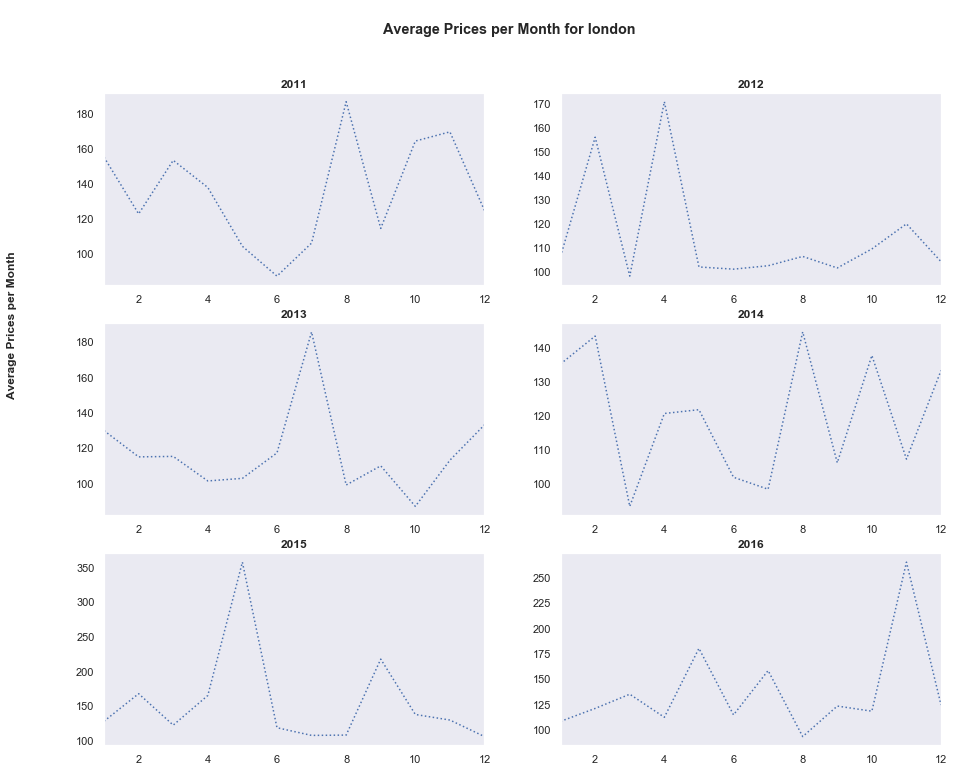

In [14]:
data_2011=df_selected[df_selected['host_since_year'] == 2011].groupby('host_since_month')['price'].mean()
data_2012=df_selected[df_selected['host_since_year'] == 2012].groupby('host_since_month')['price'].mean()
data_2013=df_selected[df_selected['host_since_year'] == 2013].groupby('host_since_month')['price'].mean()
data_2014=df_selected[df_selected['host_since_year'] == 2014].groupby('host_since_month')['price'].mean()
data_2015=df_selected[df_selected['host_since_year'] == 2015].groupby('host_since_month')['price'].mean()
data_2016=df_selected[df_selected['host_since_year'] == 2016].groupby('host_since_month')['price'].mean()

# plot above data in vertical rows
plt.figure(figsize=(15,12))

sns.set(style="dark")
plt.subplot(3,2,1)
data_2011.plot(style=':')
plt.title('2011',fontweight='bold')
plt.xlabel('')

plt.subplot(3,2,2)
data_2012.plot(style=':')
plt.title('2012',fontweight='bold')
plt.xlabel('')

plt.subplot(3,2,3)
data_2013.plot(style=':')
plt.title('2013',fontweight='bold')
plt.xlabel('')

plt.subplot(3,2,4)
data_2014.plot(style=':')
plt.title('2014',fontweight='bold')
plt.xlabel('')

plt.subplot(3,2,5)
data_2015.plot(style=':')
plt.title('2015',fontweight='bold')
plt.xlabel('')

plt.subplot(3,2,6)
data_2016.plot(style=':')
plt.title('2016',fontweight='bold')
plt.xlabel('')

# set the titles for the graph
plt.suptitle('\nAverage Prices per Month for london\n', fontweight='bold')
plt.text(-15,500, 'Average Prices per Month', fontweight='bold', va='center', rotation='vertical')

plt.show()

# Conclusion

From the first plot we can say that the airbnb's growth was exponential from 2009 to 2015 then suddenly it decreased may be because of other rivals and a significant and most interesting change we can see at year 2020 due to corona virus pandemic reviews dropped down means people are not able to make their trips

In second graph between host id and the no. of review we can say these are the top host of the london and one had succesfully gained more than 800 reviews

In third plot between host_response_rate and review_score we can say for host to be a super host they have to maintain the review rate as high as 95% however some outliers are their and most of the host have succesfully secured a review rate of more than 80%

In second last plot we have information related to no. of reviews with respect to month and common point in all the years from 2011 to 2016 is at the time of june to july the reviews increases means people visits more and in 2011 the reviews are more in october to december and in plot of 2012 suddenly graph goes down during october to december but it is not possible so it means reviews are not provided by peoples. This feature can't be used in model because it is very inconsistent.

Price v/s month plot is also very inconsistent and shows in most of the years prices were high during october to december and almost in all years prices were high between march to june this was because of the winter and summer holidays respectively.
